#House Price Prediction


In [80]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import random
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,d2_pinball_score
!pip install pycaret
import pycaret

#1.READ DATA"

In [81]:
df = pd.read_csv('/content/drive/MyDrive/Project/California_Housing_Prices_Predict/data.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [84]:
#change Dtype
features = ["ocean_proximity"]
def convert_cat(df,features) :
  for feature in features :
    df[feature] = df[feature].astype("category")
convert_cat(df, features)


#2.Visualize data

Text(0.5, 1.0, 'ocean_proximity')

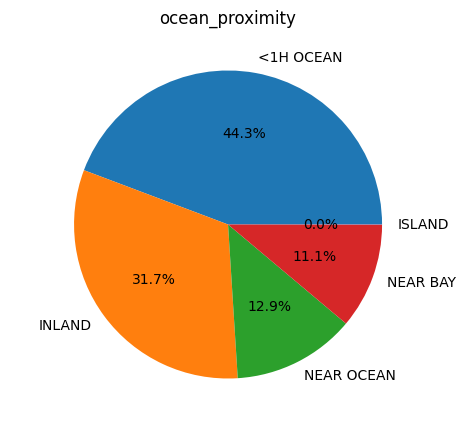

In [85]:
fig = plt.figure(figsize=(5,5))
df['ocean_proximity'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("ocean_proximity")


In [86]:
#Compatibility of data columns with each other
sns.pairplot(df);

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

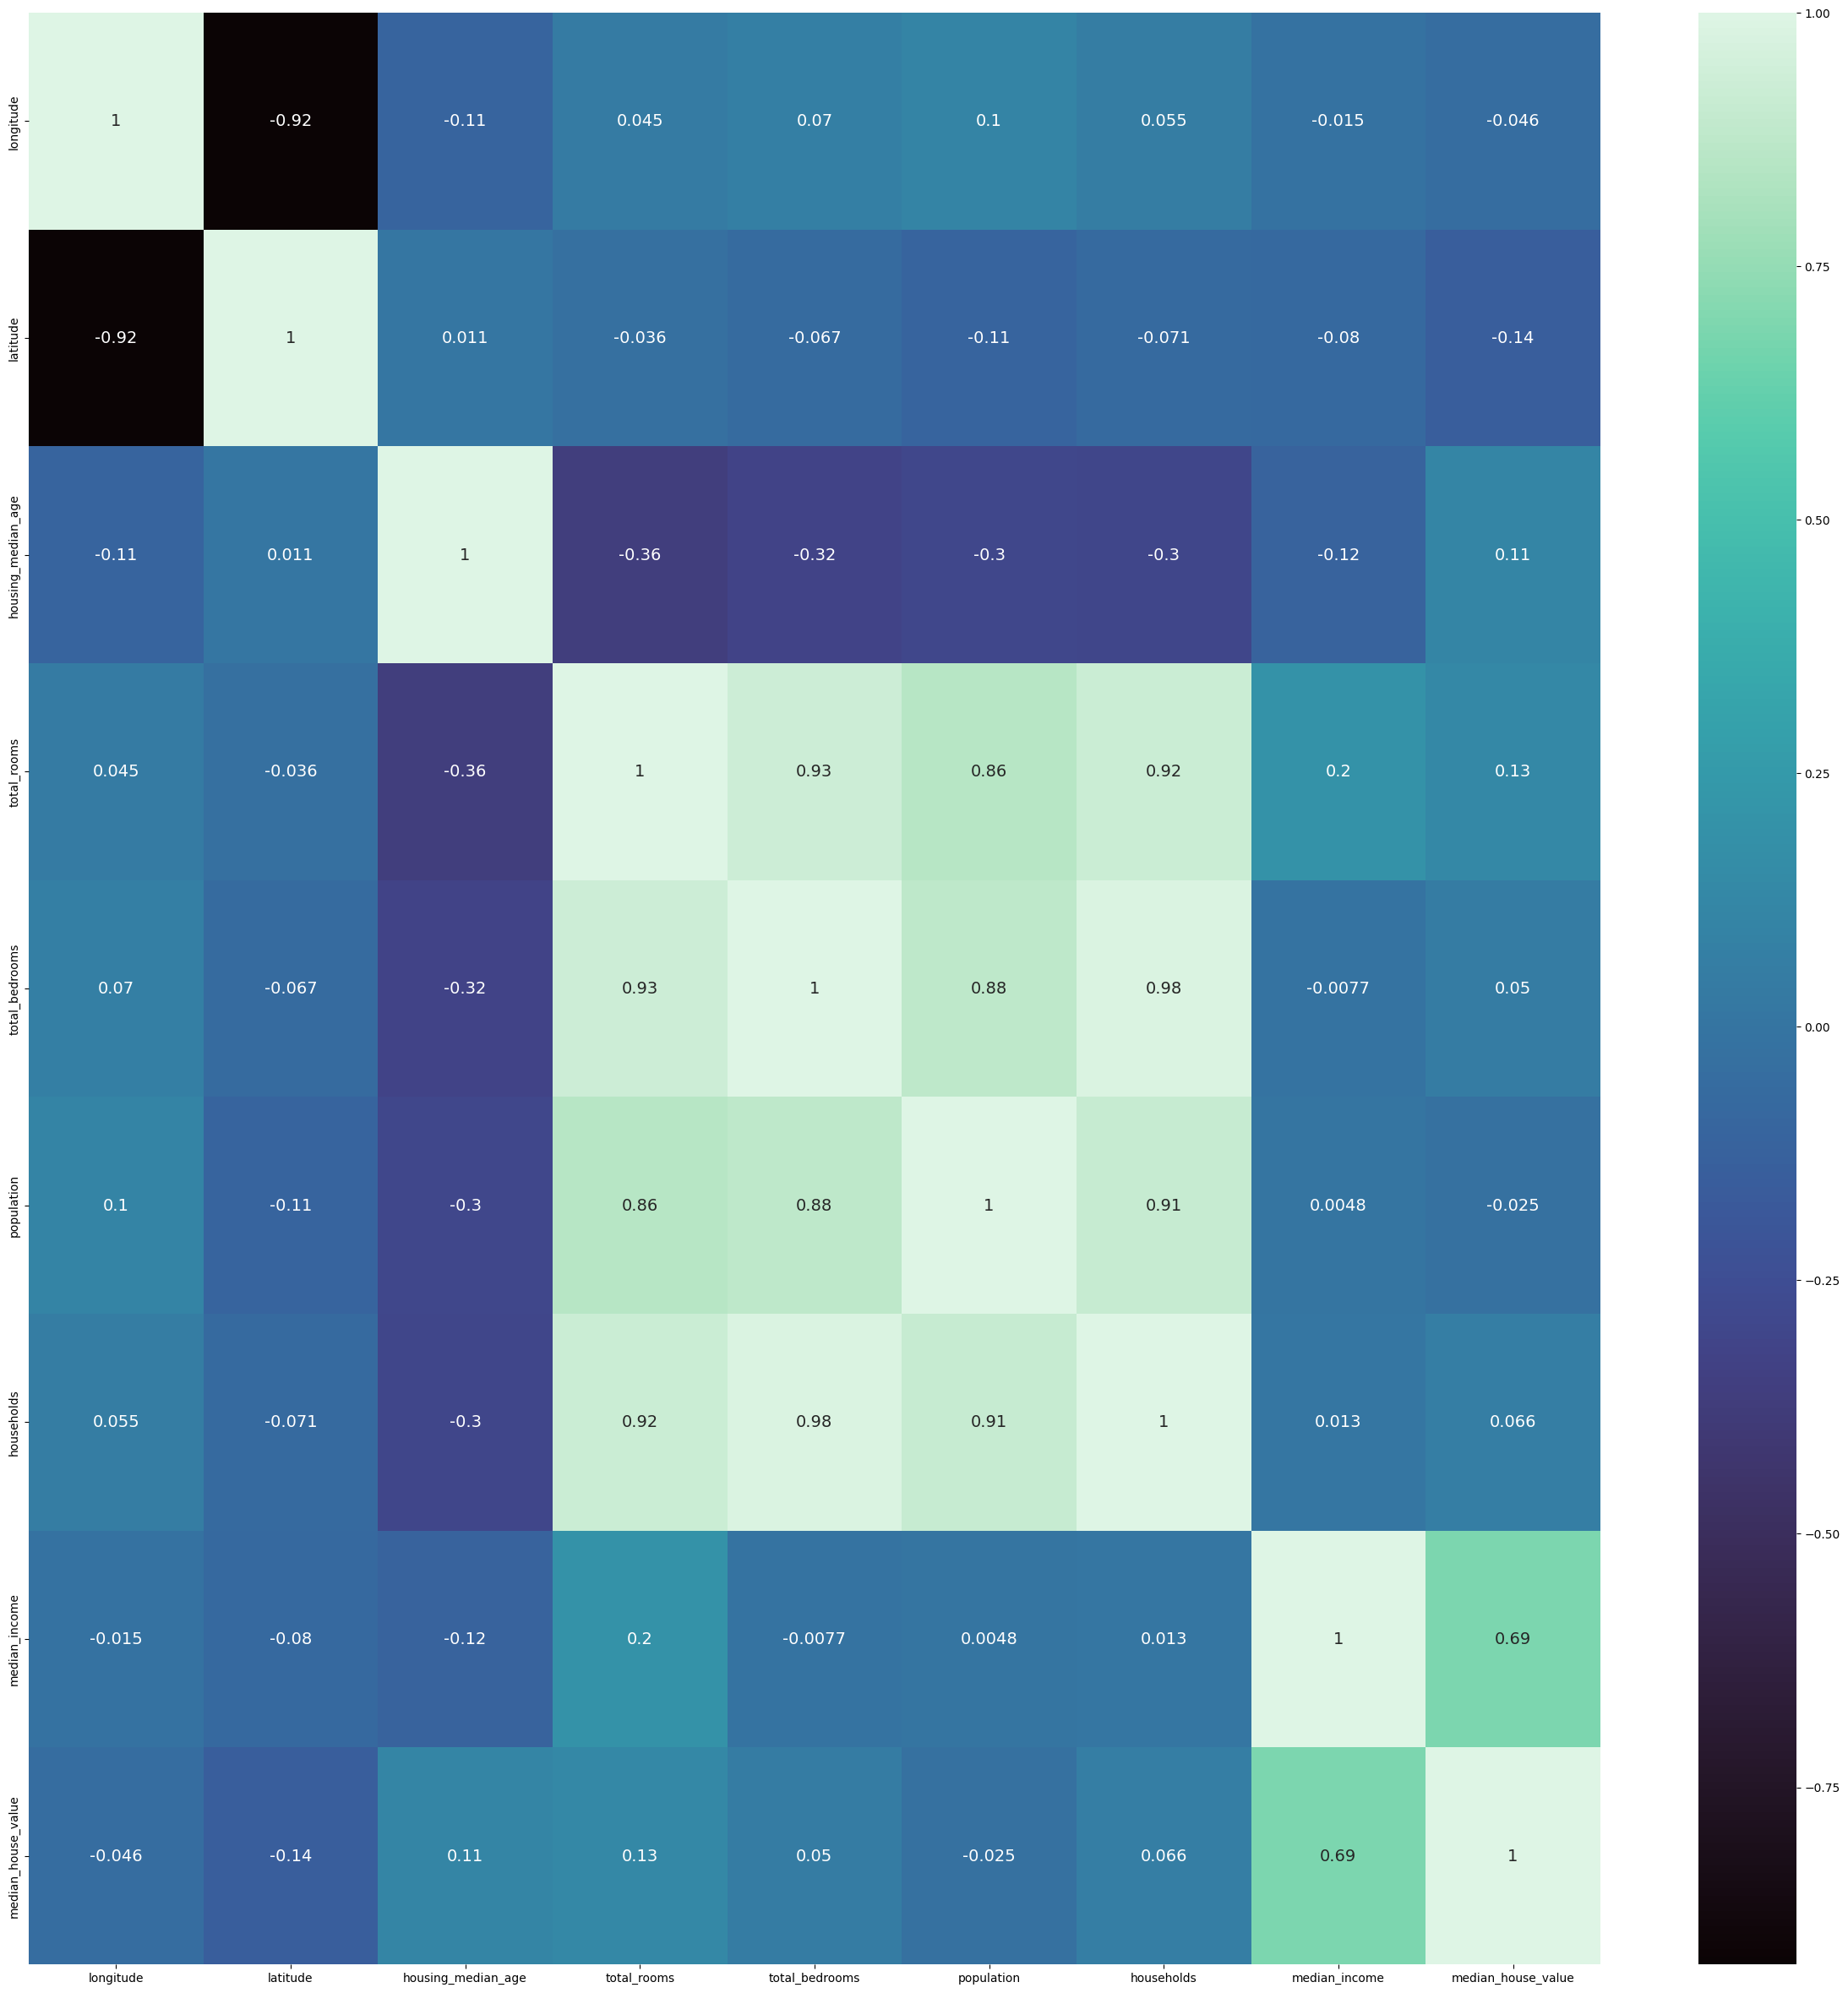

In [87]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="mako", annot_kws={"size":14})

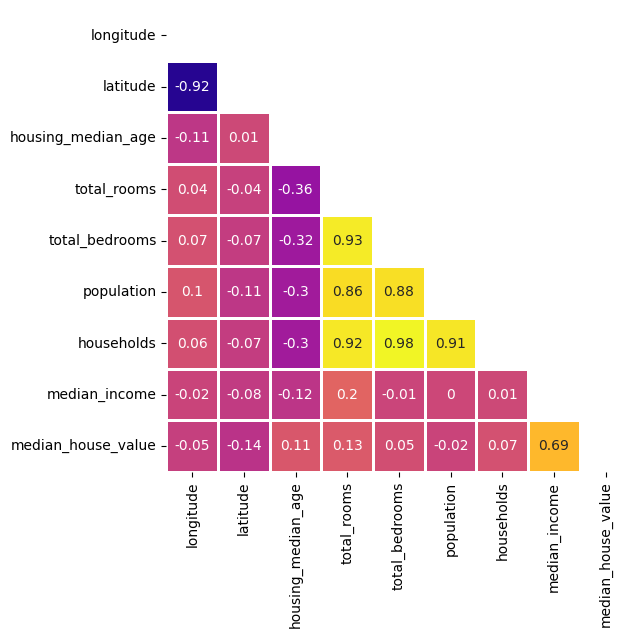

In [88]:
def corrMat(df,id=False):

    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()
corrMat(df)

In [89]:
tmp = df.corr()
tmp["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

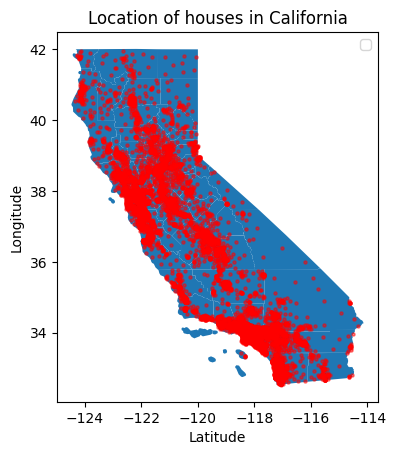

In [90]:
#breakdown on the map
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the map data
cam = gpd.read_file("/content/drive/MyDrive/Project/California_Housing_Prices_Predict/ca_counties.geojson")

# Create an axis object
ax = cam.plot()

# Plot the points on the axis
ax.scatter(x=df['longitude'], y=df['latitude'], marker='o', color='red', linestyle='None',s=5 ,alpha=0.5)

# Set the axis labels
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

# Set the title of the plot
plt.title('Location of houses in California')

# Show the legend
plt.legend()

# Show the plot
plt.show()



In [91]:
# defining a simple plot function, input list containing features of names found in dataframe
!pip install geoplot
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

def plotTwo(df,lst):

    # load california from module, common for all plots
    #cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    #cali = cali.assign(area=cali.geometry.area)
    cali = gpd.read_file("/content/drive/MyDrive/Project/California_Housing_Prices_Predict/ca_counties.geojson")

    # Create a geopandas geometry feature; input dataframe should contain .longtitude, .latitude
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
    proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    ii=-1
    fig,ax = plt.subplots(1,2,figsize=(21,6),subplot_kw={'projection': proj})
    for i in lst:

        ii+=1
        tgdf = gdf.sort_values(by=i,ascending=True)
        gplt.polyplot(cali,projection=proj,ax=ax[ii]) # the module already has california
        gplt.pointplot(tgdf,ax=ax[ii],hue=i,cmap='plasma',legend=True,alpha=1.0,s=3) #
        ax[ii].set_title(i)

    plt.tight_layout()
    plt.subplots_adjust(wspace=-0.5)

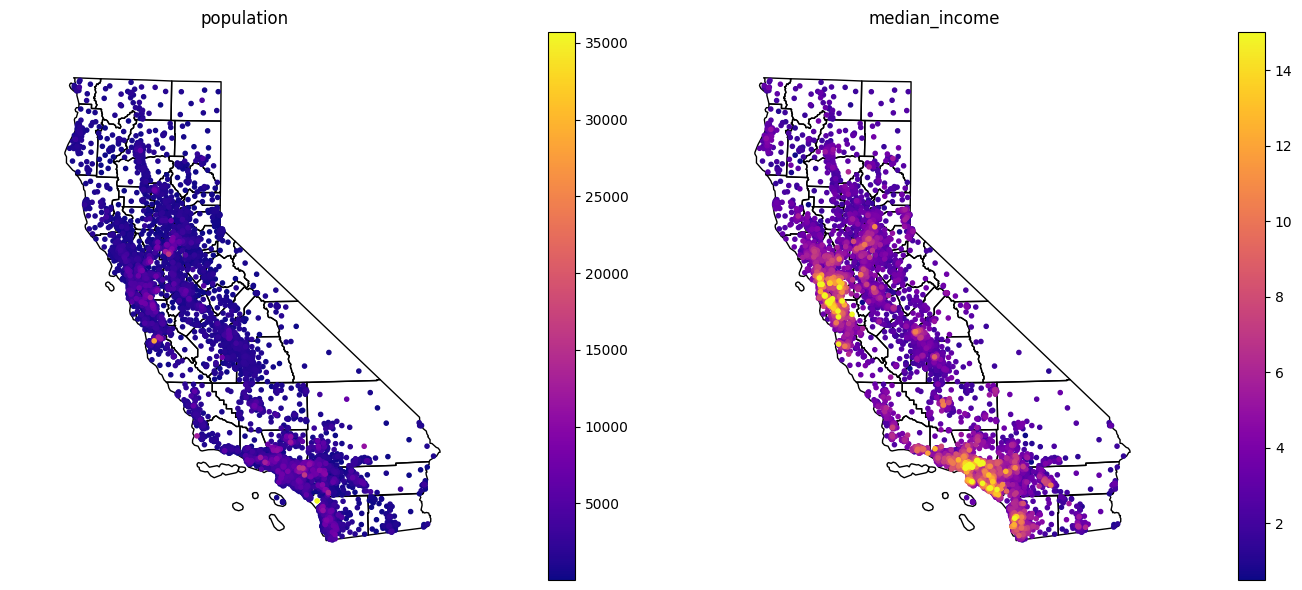

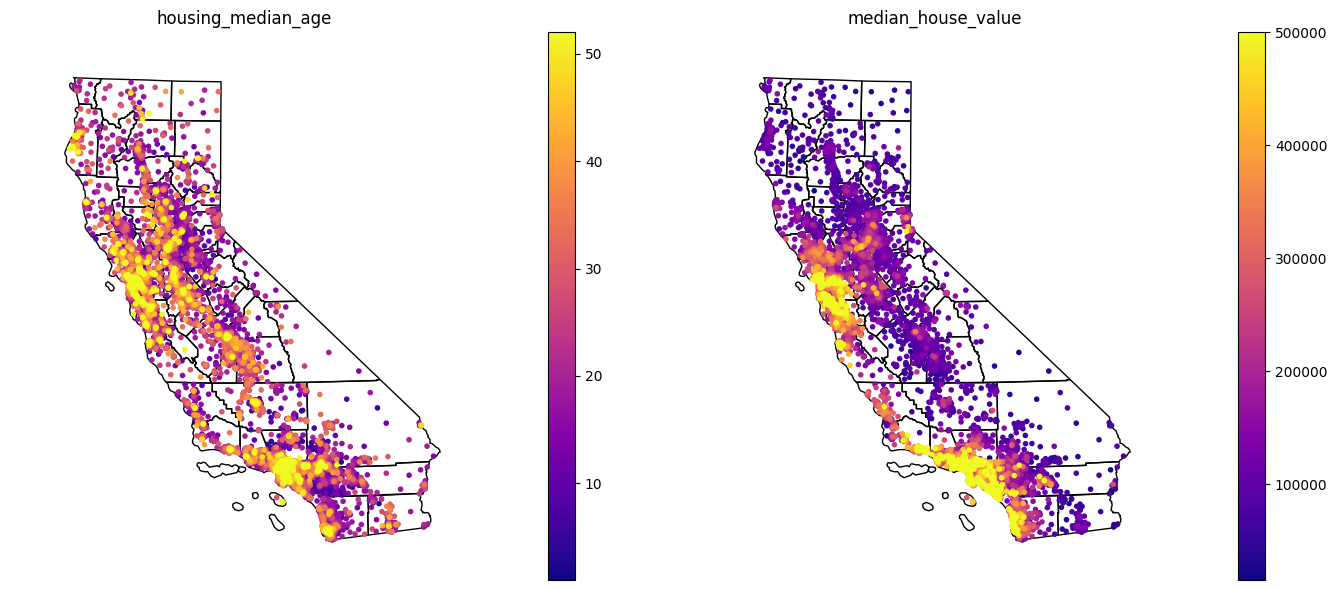

In [92]:
# Call function that plots two geopandas plots
plotTwo(df,['population','median_income'])
plotTwo(df,['housing_median_age','median_house_value'])


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

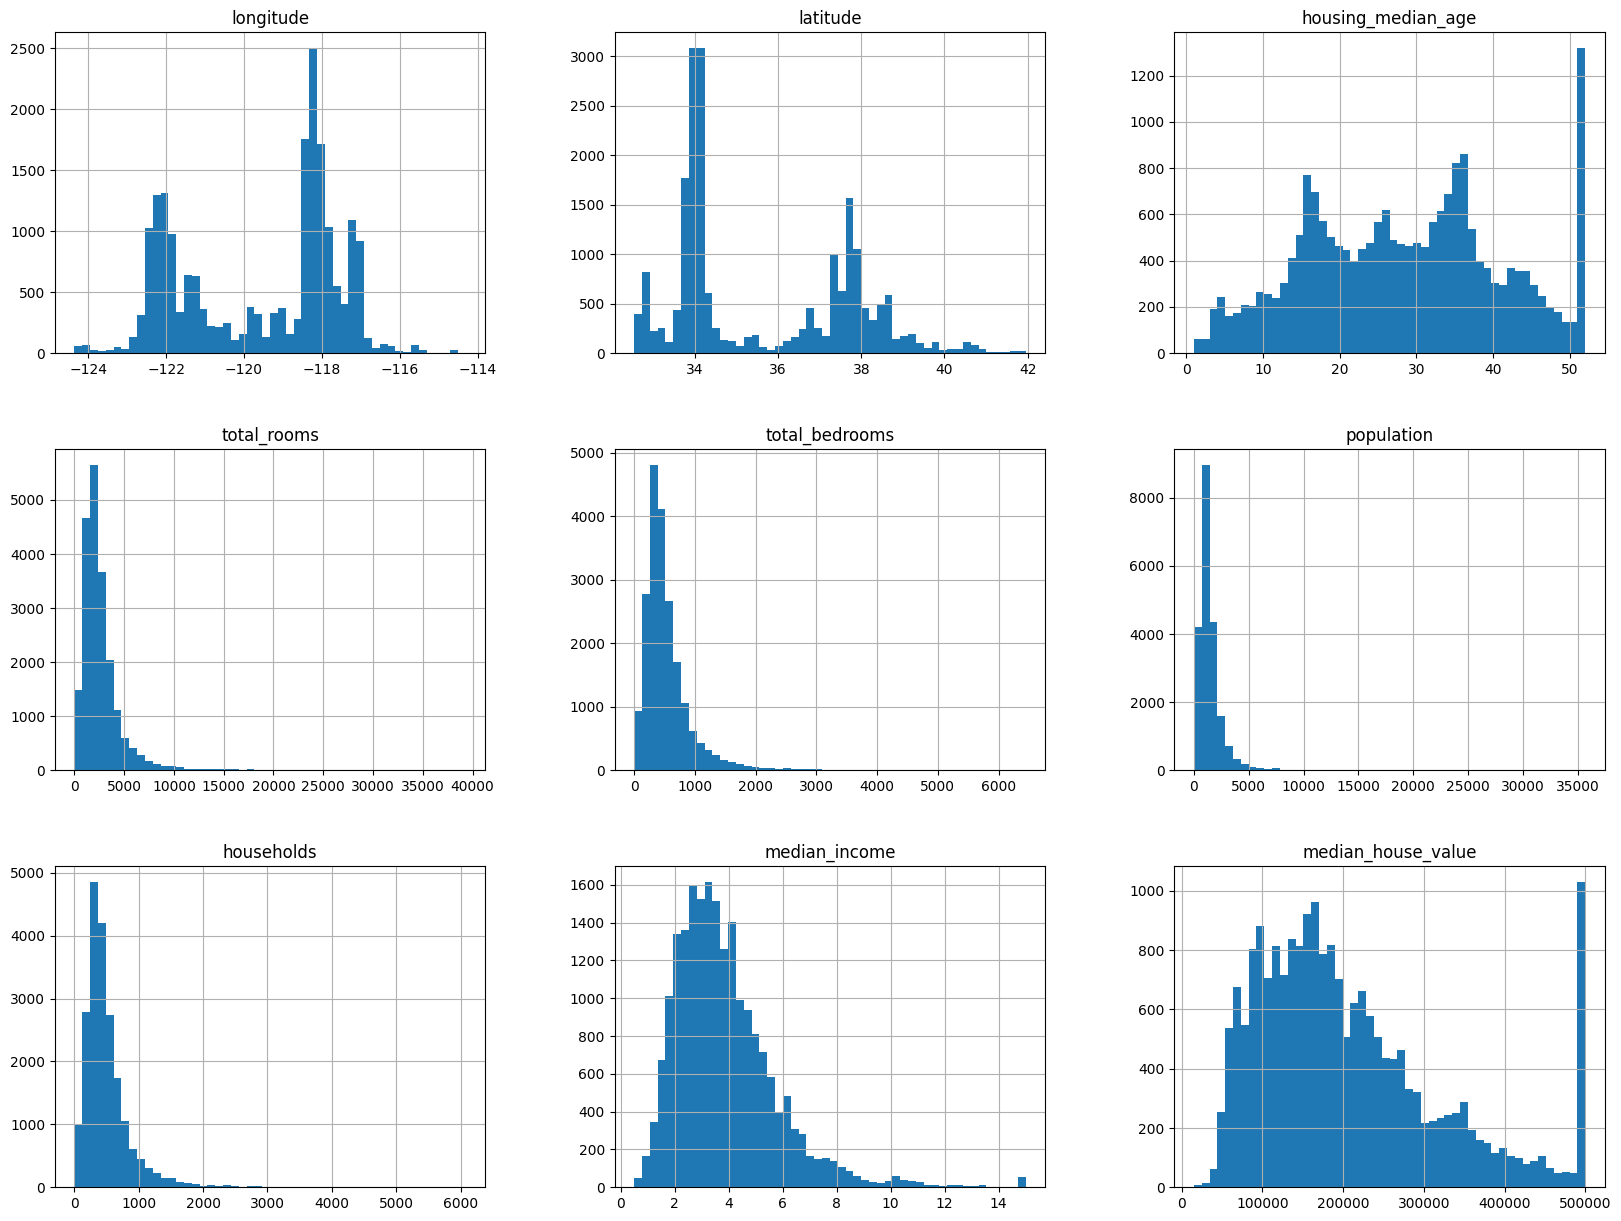

In [93]:
df.hist(bins = 50, figsize=(20,15))

#3.Filling missin value

In [94]:
#number total bedroom is null
df["total_bedrooms"].isnull().sum()

207

In [95]:
(df["total_bedrooms"].isnull().sum())/(df["total_bedrooms"].sum())*100

0.0018834775255181634

In [96]:
# The average total_bedroom arccording to sex and pclass value
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [97]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [98]:
# change data for ocean proximity
col_name = df['ocean_proximity'].unique()
df = df.replace(col_name,range(0,len(col_name)))


#4.Train Model 1

In [99]:
#Create features and label datasets
X = df.drop(columns=['median_house_value'])
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252               0  
1      2401.0      1138.0         8.3014               0  
2       496.0       177.0         7.2574               0  
3       558.0       219.0         5.6431               0  
4       565.0       259.0         3.8462               0

In [100]:
y = df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

Linear_model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
OLS = LinearRegression()
OLS.fit(X_train,y_train)

LinearRegression()

In [104]:
#display the intercept and coefficient of the OLS model
print("Intercept : " + str(OLS.intercept_))
print("Coefficients : " + str(OLS.coef_))
print("The R-squared value is : " + str(OLS.score(X_train,y_train)))

Intercept : -3537544.0870067338
Coefficients : [-4.22767238e+04 -4.21618327e+04  1.13461275e+03 -6.89240087e+00
  8.64213764e+01 -3.93717083e+01  7.24319704e+01  4.00623200e+04
 -2.59874623e+03]
The R-squared value is : 0.6375774620195571


In [105]:
#predicting with OLS
y_pred = OLS.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS':y_pred,'ACTUAL VALUES':y_test,'Disitant':(y_pred-y_test)})
performance.head()

PREDICTIONS  ACTUAL VALUES       Disitant
4712   242219.610712       355000.0 -112780.389288
2151   102677.325743        70700.0   31977.325743
15927  252169.868614       229400.0   22769.868614
82     162308.139737       112500.0   49808.139737
8161   284598.613188       225400.0   59198.613188

In [106]:
#preparing data for plotting
performance.reset_index(drop = True, inplace=True)
performance.reset_index(inplace = True)
performance.head()

index    PREDICTIONS  ACTUAL VALUES       Disitant
0      0  242219.610712       355000.0 -112780.389288
1      1  102677.325743        70700.0   31977.325743
2      2  252169.868614       229400.0   22769.868614
3      3  162308.139737       112500.0   49808.139737
4      4  284598.613188       225400.0   59198.613188

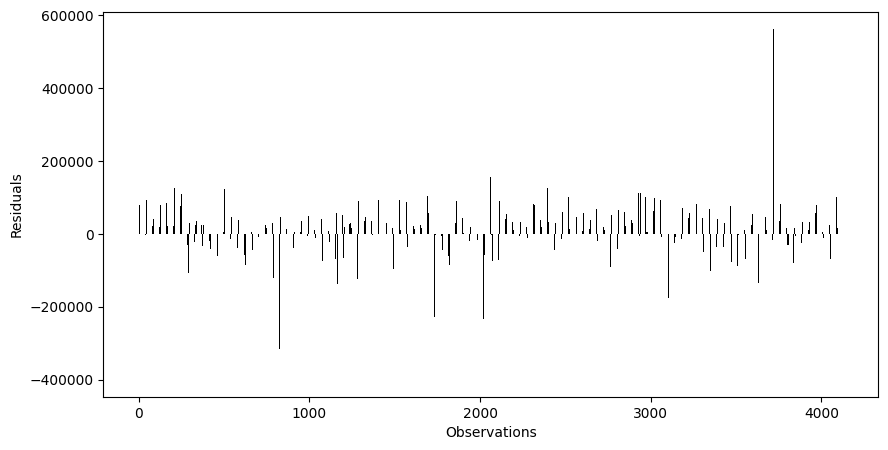

In [107]:
#plot the residual
fig = plt.figure(figsize=(10,5))
plt.bar('index','Disitant',data=performance, color='black',width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

LightGBM

In [108]:
from sklearn.ensemble import ExtraTreesRegressor

In [109]:
ETR = ExtraTreesRegressor(n_estimators=100, random_state=0)

In [110]:
ETR.fit(X_train,y_train)

ExtraTreesRegressor(random_state=0)

In [111]:


print("The R-squared value is : " + str(ETR.score(X_test,y_test)))

The R-squared value is : 0.8007418668464363


In [112]:
#predicting with ETR
y_pred = ETR.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS':y_pred,'ACTUAL VALUES':y_test,'Disitant':(y_pred-y_test)})
performance.head()

PREDICTIONS  ACTUAL VALUES  Disitant
4712     321653.01       355000.0 -33346.99
2151      63275.00        70700.0  -7425.00
15927    239974.02       229400.0  10574.02
82       199345.12       112500.0  86845.12
8161     261011.03       225400.0  35611.03

In [113]:
#preparing data for plotting
performance.reset_index(drop = True, inplace=True)
performance.reset_index(inplace = True)
performance.head()

index  PREDICTIONS  ACTUAL VALUES  Disitant
0      0    321653.01       355000.0 -33346.99
1      1     63275.00        70700.0  -7425.00
2      2    239974.02       229400.0  10574.02
3      3    199345.12       112500.0  86845.12
4      4    261011.03       225400.0  35611.03

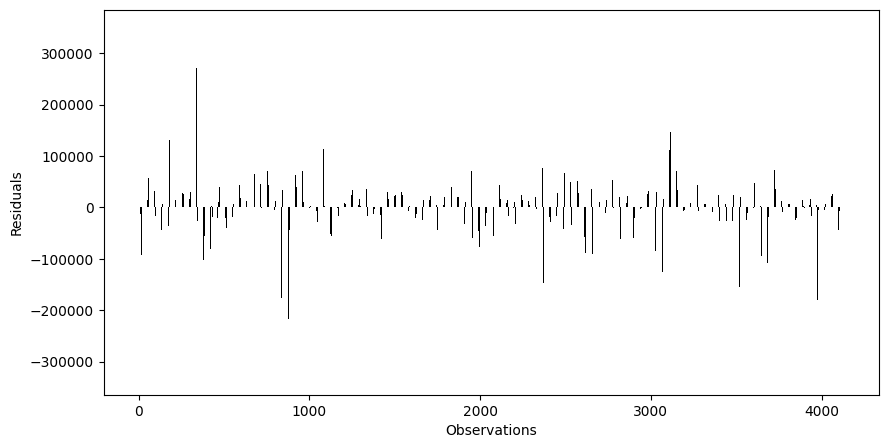

In [114]:
#plot the residual
fig = plt.figure(figsize=(10,5))
plt.bar('index','Disitant',data=performance, color='black',width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

Preprocess data

In [115]:
pre_df=df
pre_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
20635               2  
20636               2  
20637               2  
20638               2  
20639               2  

[20640 rows x 10 columns]

In [116]:


# Tạo cột mới
new_column = (pre_df['population']/pre_df['households'])
# Nối cột mới vào bảng dataframe
pre_df['population/household']=new_column
new_column = (pre_df['median_income']/pre_df['total_bedrooms'])
pre_df['median_income/room']=new_column

In [117]:
pre_df.head(-5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20630    -121.32     39.29                11.0       2640.0           505.0   
20631    -121.40     39.33                15.0       2655.0           493.0   
20632    -121.45     39.26                15.0       2319.0           416.0   
20633    -121.53     39.19                27.0       2080.0           412.0   
20634    -121.56     39.27                28.0       2332.0           395.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20630      1257.0       445.0         3.5673            112000.0   
20631      1200.0       432.0         3.5179            107200.0   
20632      1047.0       385.0         3.1250            115600.0   
20633      1082.0       382.0         2.5495             98300.0   
20634      1041.0       344.0         3.7125            116800.0   

      ocean_proximity  population/household  median_income/room  
0                   0              2.555556            0.064536  
1                   0              2.109842            0.007506  
2                   0              2.802260            0.038197  
3                   0              2.547945            0.024013  
4                   0              2.181467            0.013736  
...               ...                   ...                 ...  
20630               2              2.824719            0.007064  
20631               2              2.777778            0.007136  
20632               2              2.719481            0.007512  
20633               2              2.832461            0.006188  
20634               2              3.026163            0.009399  

[20635 rows x 12 columns]

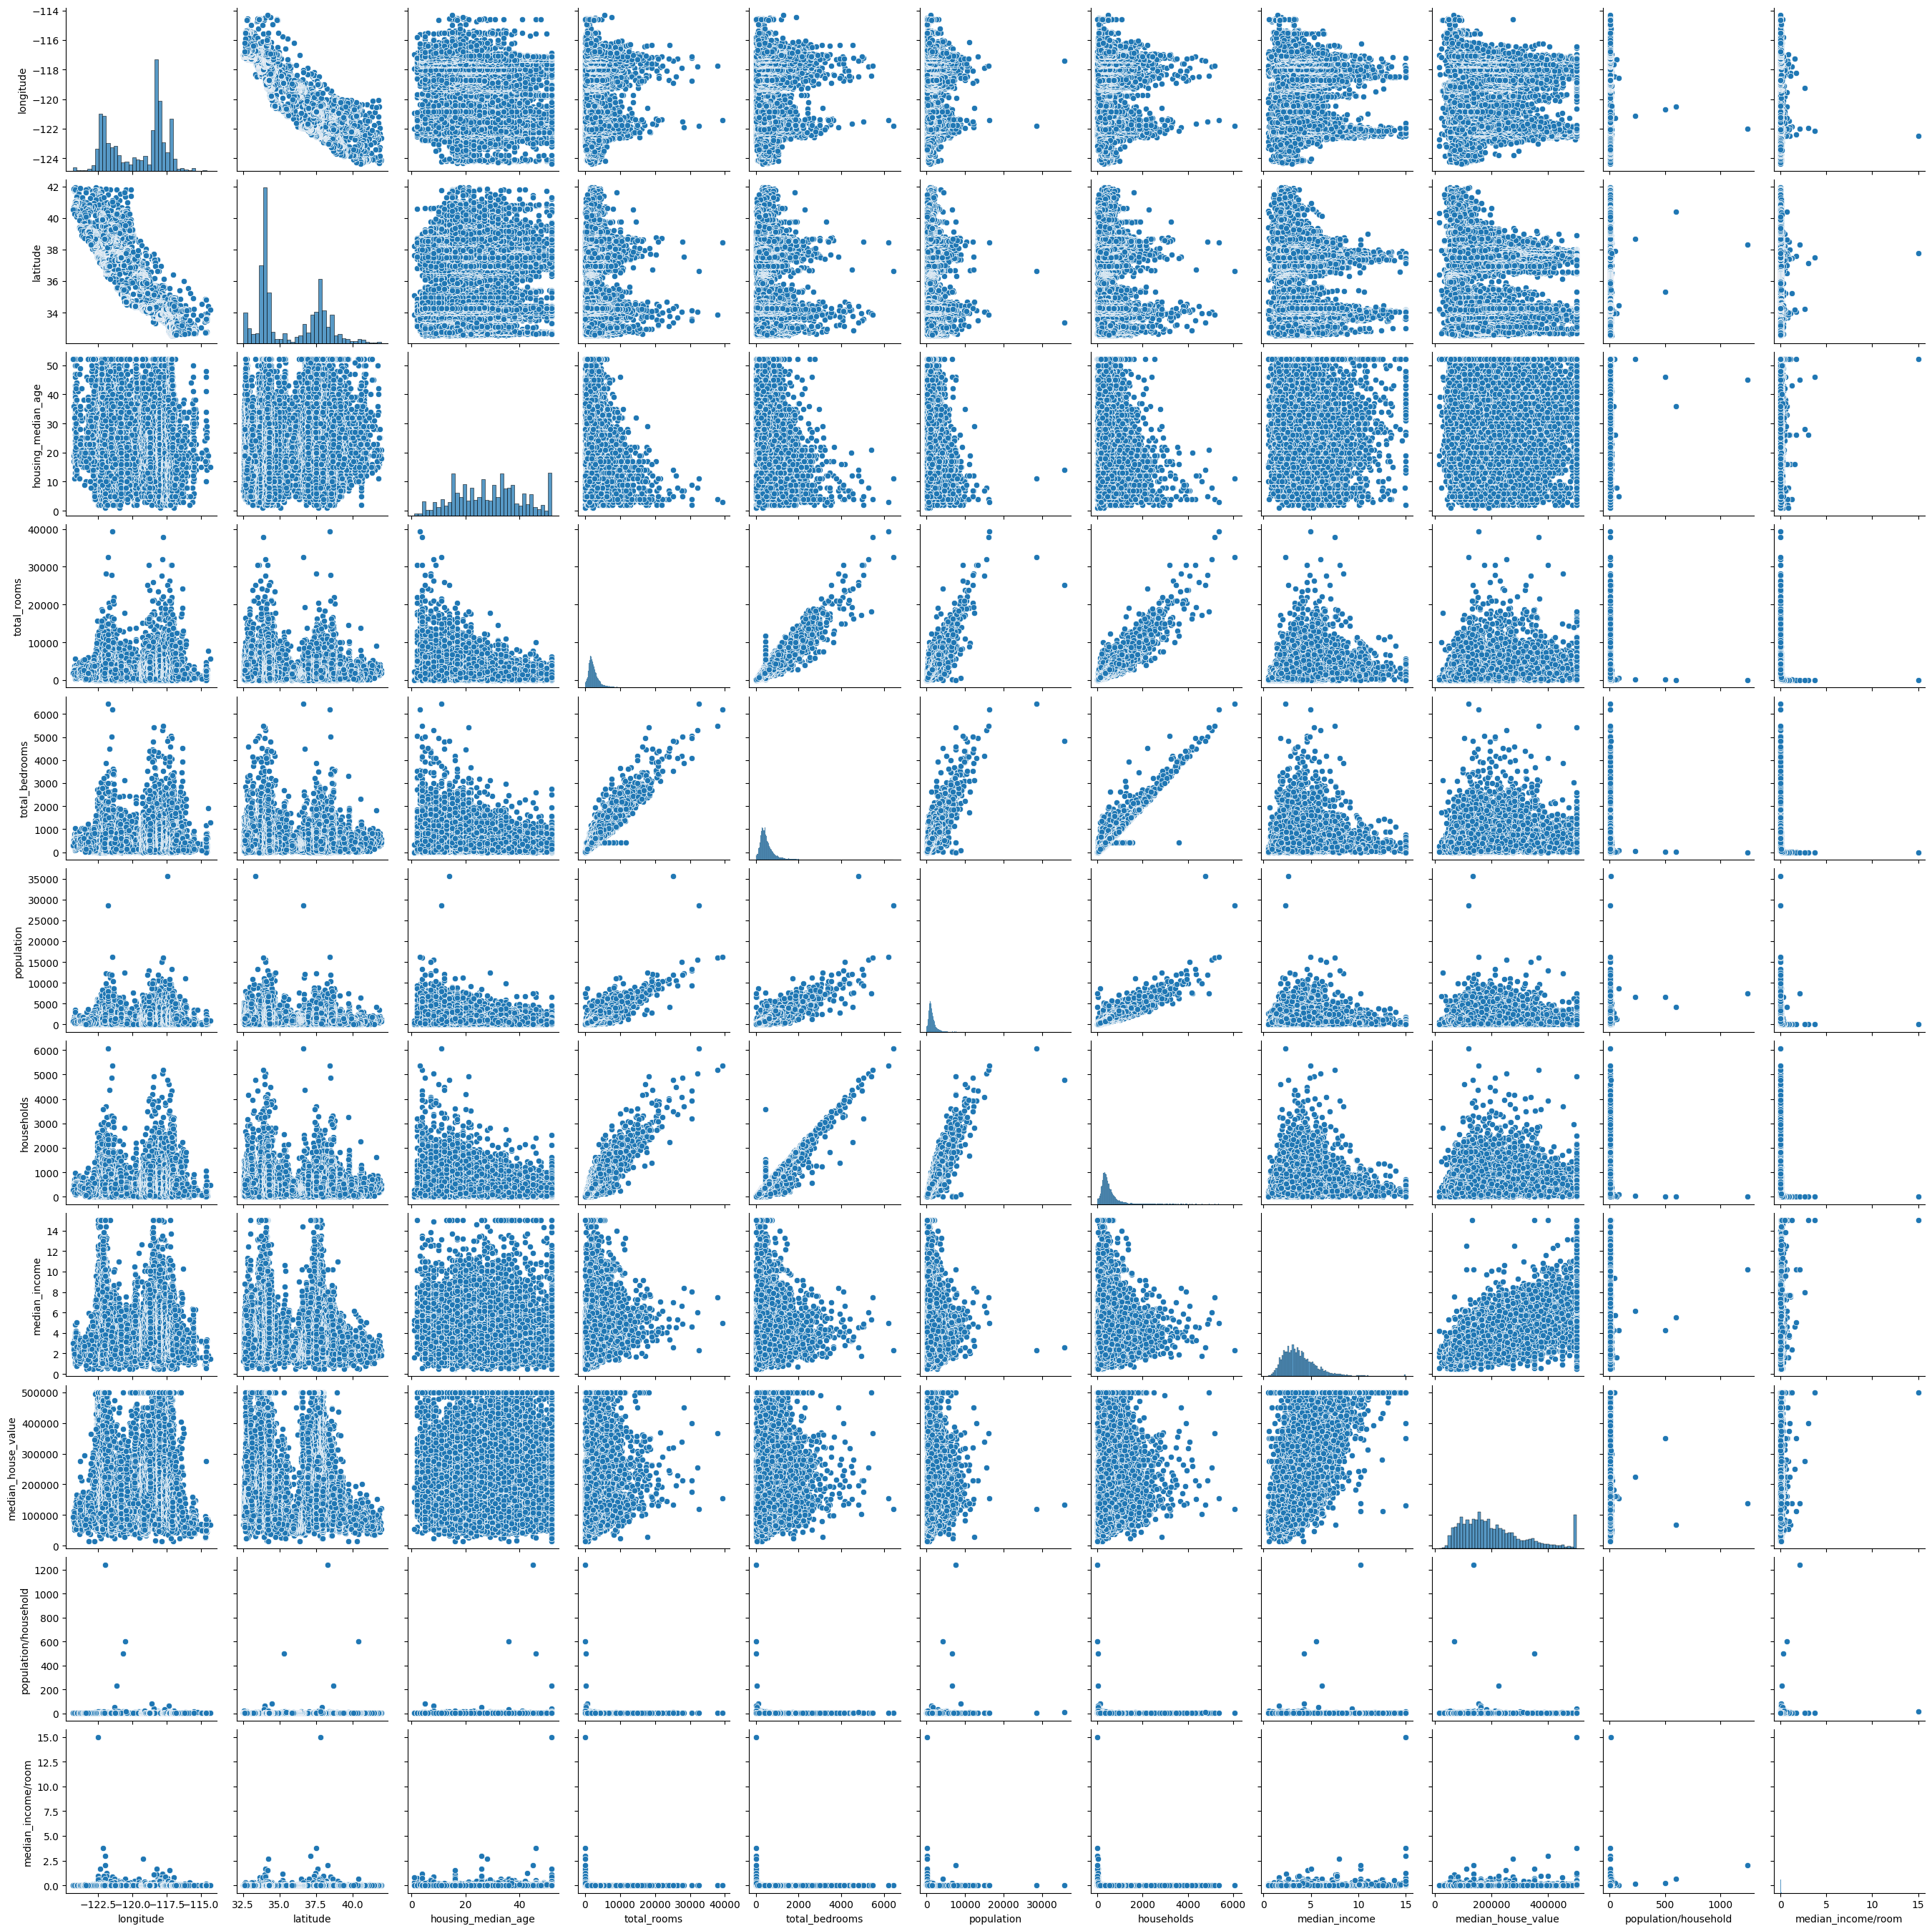

In [118]:
#Compatibility of data columns with each other
sns.pairplot(pre_df);

In [119]:
#Create features and label datasets
X = pre_df.drop(columns=['median_house_value'])
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  \
0       322.0       126.0         8.3252               0   
1      2401.0      1138.0         8.3014               0   
2       496.0       177.0         7.2574               0   
3       558.0       219.0         5.6431               0   
4       565.0       259.0         3.8462               0   

   population/household  median_income/room  
0              2.555556            0.064536  
1              2.109842            0.007506  
2              2.802260            0.038197  
3              2.547945            0.024013  
4              2.181467            0.013736

In [120]:
y = pre_df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

LightGBM

In [122]:
from sklearn.ensemble import ExtraTreesRegressor

In [123]:
ETR = ExtraTreesRegressor(n_estimators=100, random_state=0)

In [124]:
ETR.fit(X_train,y_train)

ExtraTreesRegressor(random_state=0)

In [125]:


print("The R-squared value is : " + str(ETR.score(X_test,y_test)))

The R-squared value is : 0.8035989567499766


In [126]:
#predicting with ETR
y_pred = ETR.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS':y_pred,'ACTUAL VALUES':y_test,'Disitant':(y_pred-y_test)})
performance.head()

PREDICTIONS  ACTUAL VALUES  Disitant
4712     344970.11       355000.0 -10029.89
2151      64660.00        70700.0  -6040.00
15927    223230.00       229400.0  -6170.00
82       177478.03       112500.0  64978.03
8161     282790.00       225400.0  57390.00

In [127]:
#preparing data for plotting
performance.reset_index(drop = True, inplace=True)
performance.reset_index(inplace = True)
performance.head()

index  PREDICTIONS  ACTUAL VALUES  Disitant
0      0    344970.11       355000.0 -10029.89
1      1     64660.00        70700.0  -6040.00
2      2    223230.00       229400.0  -6170.00
3      3    177478.03       112500.0  64978.03
4      4    282790.00       225400.0  57390.00

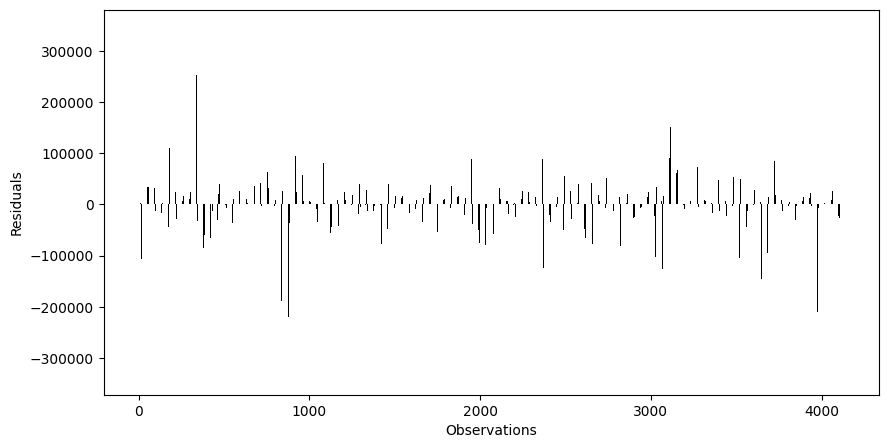

In [128]:
#plot the residual
fig = plt.figure(figsize=(10,5))
plt.bar('index','Disitant',data=performance, color='black',width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()